# Unsupervised Machine Learning
## k-Means Clustering

One simple *unsupervised machine learning algorithm* is **K-Means Clustering** - analyzes *unlabeled* samples and attempts to place them in clusters that appear to be related. The *K* in **K-Means** represents the desired number of clusters imposed on the data. Each cluster of samples is grouped around a *centroid* - the cluster's center point. The initial centroids are chosen randomly from the dataset's samples. The remaining samples are placed in the cluster whose centroid is the closest. The centroids are *iteratively* recalculated and the samples are re-assigned to clusters until the distances from a given centroid to the samples in its cluster are minimized. The algorithm results in a one-dimensional array of labels indicating the cluster to which each sample belongs and a two-dimensional array of centroids representing the center of each cluster. Though **K-Means** is a popular choice for classification, it may not be the most optimal model for our data so the end of this example will compare the performance of different algorithms to see which is most accurate.

__[More info on K-Means](https://en.wikipedia.org/wiki/K-means_clustering)__

__[More info on SciKit Learn K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)__


### Load Wine Dataset
`%matplotlib inline` to enable Matplotlib in this notebook.

This example will use the **wine** *scikit* bundled data set. The data will loaded using `load_wine` module. Labels will not be necessary to perform clustering. This is reffered to as a *toy dataset* because of the limited number of samples and features which is significantly smaller than datasets used in real applications. This data set contains 178 samples, 10 features and three classes.

**NOTE** the data info says there are 178 samples with 50 samples in each class, however, after inspecting the class amount was found as follows:

* `class_0` = 59 samples

* `class_1` = 71 samples

* `class_2` = 48 samples

While researching, fixing the asymetry of the samples by only keeping 48 samples of each class did not improve results by much but is still done for practice. Therefore, new samples will be reduced to **48** samples in each of three classes since 48 was the minimum amount of samples out of the given three clases. *Pandas* and *NumPy* will be used to edit the samples and store the new list of corresponding targets.

* `class_0` = 59 samples - 11 samples = 48 samples

* `class_1` = 71 samples - 23 samples = 48 samples

* `class_2` = 48 samples =  no changes

The first elements of each class of samples in `class_0` and `class_1` wll be removed. The labels will be ignored when fitting so the **K-Means** clustering algorithm will try to determine the sample's classes.

In [1]:
%matplotlib inline
from sklearn.datasets import load_wine

In [2]:
# load data
wine = load_wine()

In [3]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### Inspect Data

As always the data is first inspected by examining the dimensions of the data set. **Pandas** provides simple ways to transfer the data in a *dataframe* which comes with tools for statical analysis and building useful visualizations.

In [4]:
# check sample shape
wine.data.shape

(178, 13)

In [5]:
# check sample type
type(wine.target)

numpy.ndarray

In [6]:
# check target shape
wine.target.shape

(178,)

In [7]:
# check target names
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
# check features
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

### Evaluate Statistics

The **Pandas** package is very useful for formatting the data into column-based dataframes. A colunmn containing the class name for each sample with be added to the dataframe and will help with evaluation of the data and model results. The orginal dataframe with added column will be copied to work on preparing data for the model.

In [9]:
# import pandas package
import pandas as pd
import numpy as np

In [10]:
# control display
pd.set_option('max_columns', 5)
pd.set_option('display.width', None)

In [11]:
# create df from data
wine_df_og = pd.DataFrame(wine.data, columns=wine.feature_names)

In [12]:
# concat new column of class names
wine_df_og['class'] = [wine.target_names[i] for i in wine.target]

In [13]:
# add column of targets
wine_df_og['target'] = wine.target

In [14]:
# display df
wine_df_og.head()

,alcohol,malic_acid,...,class,target
0,14.23,1.71,...,class_0,0
1,13.20,1.78,...,class_0,0
2,13.16,2.36,...,class_0,0
3,14.37,1.95,...,class_0,0
4,13.24,2.59,...,class_0,0


In [15]:
# create copy of original
wine_df = wine_df_og.copy()

In [16]:
# check number of rows in class_0
len(wine_df[wine_df['class']=='class_0'])

59

In [17]:
# check indexes
wine_df[wine_df['class']=='class_0'].index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58],
           dtype='int64')

In [18]:
# remove 11 indexes
wine_df = wine_df.drop([x for x in range(11)])

In [19]:
#verify results
len(wine_df[wine_df['class']=='class_0'])

48

In [20]:
#verify frame
wine_df.head()

,alcohol,malic_acid,...,class,target
11,14.12,1.48,...,class_0,0
12,13.75,1.73,...,class_0,0
13,14.75,1.73,...,class_0,0
14,14.38,1.87,...,class_0,0
15,13.63,1.81,...,class_0,0


In [21]:
# check number of rows in class_1
len(wine_df[wine_df['class']=='class_1'])

71

In [22]:
# check indexes
wine_df[wine_df['class']=='class_1'].index

Int64Index([ 59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
             72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
             85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
             98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
            111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
            124, 125, 126, 127, 128, 129],
           dtype='int64')

In [23]:
# remove 23 indexes
wine_df = wine_df.drop([x for x in range(59,82)])

In [24]:
#verify results
len(wine_df[wine_df['class']=='class_1'])

48

In [25]:
#verify results
wine_df[wine_df['class']=='class_1'].head()

,alcohol,malic_acid,...,class,target
82,12.08,1.13,...,class_1,1
83,13.05,3.86,...,class_1,1
84,11.84,0.89,...,class_1,1
85,12.67,0.98,...,class_1,1
86,12.16,1.61,...,class_1,1


In [26]:
# check number of rows in class_2
len(wine_df[wine_df['class']=='class_2'])

48

In [27]:
# check indexes
wine_df[wine_df['class']=='class_2'].index

Int64Index([130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
            143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
            156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
            169, 170, 171, 172, 173, 174, 175, 176, 177],
           dtype='int64')

In [28]:
# reindex data
wine_df.index = pd.Index([x for x in range(144)])

In [29]:
# verify reindex
wine_df.head(10)

,alcohol,malic_acid,...,class,target
0,14.12,1.48,...,class_0,0
1,13.75,1.73,...,class_0,0
2,14.75,1.73,...,class_0,0
3,14.38,1.87,...,class_0,0
4,13.63,1.81,...,class_0,0
5,14.30,1.92,...,class_0,0
6,13.83,1.57,...,class_0,0
7,14.19,1.59,...,class_0,0
8,13.64,3.10,...,class_0,0
9,14.06,1.63,...,class_0,0


In [30]:
# store new list of targets
new_targets = [wine_df['target'][i] for i in range(144)]

In [31]:
# verify targets
new_targets[::48]

[0, 1, 2]

In [32]:
# drop target column from frame
wine_df = wine_df.drop('target',axis=1)

In [33]:
# set decimal points
pd.set_option('precision', 2)

In [34]:
# view statistics
wine_df.describe()

,alcohol,malic_acid,...,od280/od315_of_diluted_wines,proline
count,144.00,144.00,...,144.00,144.00
mean,12.99,2.51,...,2.56,739.14
std,0.80,1.14,...,0.72,305.67
min,11.03,0.74,...,1.27,290.00
25%,12.37,1.67,...,1.82,510.00
50%,13.05,2.00,...,2.76,660.00
75%,13.65,3.32,...,3.16,945.25
max,14.75,5.80,...,4.00,1680.00


In [35]:
# confirm 3 unique values
wine_df['class'].describe()

count         144
unique          3
top       class_0
freq           48
Name: class, dtype: object

## Visualizing Data

Another way to learn more about the dataset is to see how the featurs relate to one another. This dataset has too many features to graph one against the others in a single graph. A `pairplot` from *seaborn* can resolve this by creating a grid of graphs. 

In [36]:
# import seaborn package
import seaborn as sns

In [37]:
# set font size
sns.set(font_scale=1.1)

In [38]:
# choose background
sns.set_style('whitegrid')

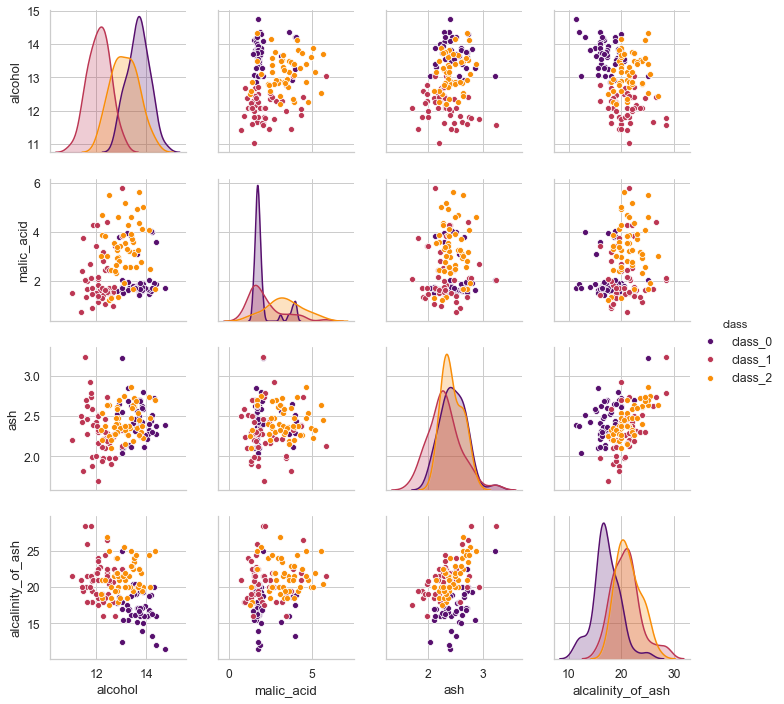

In [39]:
# create 4 x 4 grid of plots
grid = sns.pairplot(data=wine_df, vars=wine_df.columns[0:4],
     hue='class',palette='inferno')

### Displaying in one color

This can help visualize clusters and trends. This plots work well with small datasets. 

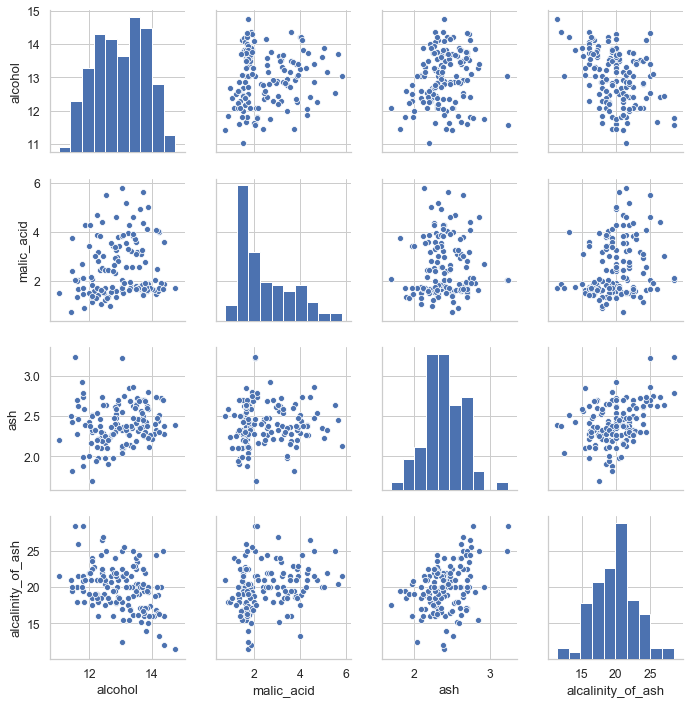

In [40]:
grid = sns.pairplot(data=wine_df, vars=wine_df.columns[0:4])

## Create KMeans Model

*Scikit Learn* provides conveinent methods for creating machine learning models. The keyword argument `n_clusters` will specify the desired hyperperameter *k* that is required to calculate the clusters and labels each sample. The algorithm calculates a centroid preseting the cluster's center data point. The default value is **8**. This example uses 3 since there are 3 classes. `random_state` is provided, like *seed*, it allows reproduction of results that are generated by calculations that use randomization. 


In [41]:
# import KMeans module
from sklearn.cluster import KMeans

In [42]:
# create model
kmeans = KMeans(n_clusters=3, random_state=11)

### Fitting the Model

The `fit` method will train the estimator and return an estimator object. 

The object will containt: 

* `labels_array` - holds values from 0 - (`n_clusters` - 1), which is 0 - 2 in this case

* `cluster_centers` - each row represents a centroid

__[More info on Kmeans Arguments](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)__

In [43]:
# return edited frame to numpyarray
import numpy as np
#### wine_data_edit will now be used for data instead of wine.data 
wine_data_edit = np.asarray(wine_df.drop('class',axis=1))

In [44]:
kmeans.fit(wine_data_edit.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=11, tol=0.0001, verbose=0)

### Compare Cluster Labels to Target Values

This wine dataset contains labels that were ignored earlier. Those labels `[class_0, class_1, class_2]` **DO NOT** coordinate to the new label names, meaning, the labels returned by `kmeans` is the *predicted* label. The clustered samples are now represented by `[0,1,2]`.

For example:

* `class_0` label from `wine_data_edit` is not the same as the `0` label found in the `kmeans` object. 

**K-Means** estimator uses labels 0 - `n_clusters` - 1. These labels can be used to check the accuaracy of the model. There are 48 samples for each label, therefore, if the model is perfect then *each group of 48 labels should have a distinct label*. 

In [45]:
# verify shape
len(kmeans.labels_)

144

In [46]:
# print first 48
print(kmeans.labels_[0:48])

[1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2 1 1 2 2 1 1 2 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [47]:
# print second 48
print(kmeans.labels_[48:96])

[2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0]


In [48]:
# print third 48
print(kmeans.labels_[96:144])

[2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2
 2 2 2 0 0 2 2 2 2 2 0]


The results shows some confusion in the model. This indicates **K-Means** may not be the best algorithm to use to cluster this particular dataset. For contrast, another model will be built using **2** clusters. The results will be displayed for comparison.

In [49]:
kmeans2 = KMeans(n_clusters=2, random_state=11)

In [50]:
kmeans2.fit(wine_data_edit)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=11, tol=0.0001, verbose=0)

In [51]:
print(kmeans2.labels_[0:72])

[1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [52]:
print(kmeans2.labels_[72:144])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


There is a noticable imporovement. Other models will be created and compared later.

## Principal Component Analysis

The **PCA** will be used to in attempt to achieve higher clustering accuracy. The estimator can reduce the dimensionality of the dataset by using *principle component alysis* to analyze the dataset's features and reduce them to the specified number of dimensions. This can be used in a **pandas** dataframe to view results of the cluster. The original data will be used since it has more data points to plot

An alternative to **PCA** is the **TSNE** estimator which comes from `skleran.manifold` and performs dimension reduction. It is typically used for data sets of high dimensions. It is expensive to run but can be an alternative to PCA if the results of PCA are undesirable.

__[More info on PCA](https://scikit-learn.org/stable/modules/decomposition.html#pca)__

__[More info on TSNE](https://scikit-learn.org/stable/modules/manifold.html#t-sne)__

In [53]:
# import PCA module
from sklearn.decomposition import PCA

In [54]:
# create PCA object
pca = PCA(n_components=2, random_state=11)

### Train and Transform

Calling the `fit` and `transform` methods will train the estimator then provide data. They are called separeltly instead of using `fit_transform`. The result will be an array with the same number of rows as `wine.data` but now with only two columns. This example will *reuse* the trained estimator from `fit` to perform a second `transform` to reduce the cluster centroids from four to two dimensions. This will be needed to create a plot of the centroid locations.

In [55]:
# create model
pca.fit(wine.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=11,
    svd_solver='auto', tol=0.0, whiten=False)

In [56]:
# reduce dimensions
wine_pca = pca.transform(wine.data)

In [57]:
# confirm reduction
wine_pca.shape

(178, 2)

### Visualizing Data

The data has been reduce to two-dimensions and is now formatted for plotting. *Seaborn* provides visual tools for plotting in two and three dimensions. The data will transfered to a *pandads* dataframe then a column containing the origianl class labels will be added to distinguish colors. The`kmeans` object that was created earlier contains centroids that will have the same number of features as the original data set (10). This dimension must also be reduced. This is like obtaining the *average* sample in its cluster. Each sample will be transformed using the **PCA** estimator used previoulsy to reduce the other samples in that cluster. 

In [58]:
# transfer data to df
wine_pca_df = pd.DataFrame(wine_pca, 
                            columns=['Component1', 'Component2'])

In [59]:
# add column of labels
wine_pca_df['class'] = wine_df[['class']]

In [60]:
# vefrify transfer
wine_pca_df.head()

,Component1,Component2,class
0,318.56,21.49,class_0
1,303.10,-5.36,class_0
2,438.06,-6.54,class_0
3,733.24,0.19,class_0
4,-11.57,18.49,class_0


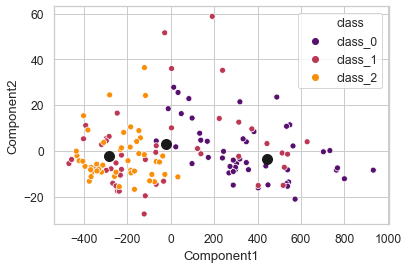

In [61]:
# build 2D plot
import matplotlib.pyplot as plt
axes = sns.scatterplot(data=wine_pca_df, x='Component1', 
     y='Component2', hue='class', legend='brief',palette='inferno') 
# reduce new dimensions
wine_centers = pca.transform(kmeans.cluster_centers_)

dots = plt.scatter(wine_centers[:,0], wine_centers[:,1], s=100, c='k')

*dimensionality reduction* can also produce a plot of three dimensions. To do so, the *PCA* estimator will be reloaded using `n_components = 3`. This will provide the proper base of dimensions. Steps to building a 3D plot are similiar to the 2D example

In [62]:
# create 3D pca
pca_3D = PCA(n_components=3, random_state=11)
# create model using original data
pca_3D.fit(wine.data)
# reduce dimensions
wine_pca_3D = pca_3D.transform(wine.data)

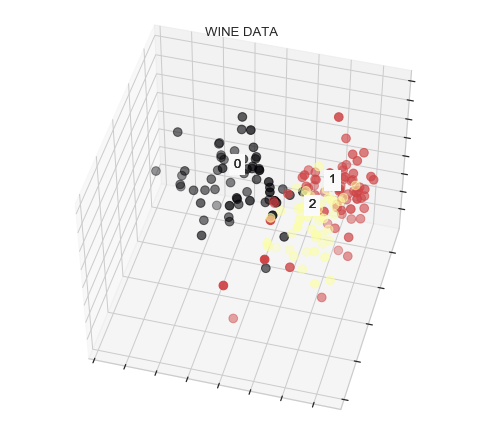

In [63]:
from mpl_toolkits.mplot3d import Axes3D
import warnings
# prevent unnessary jupyter error
warnings.filterwarnings('ignore')

# create X, Y axis data for plot
X = wine_pca_3D
y = wine.target

# create figure with desired size
figure = plt.figure(1,figsize=(10,6))
#create 3D axis object with desired angle 
axes = Axes3D(figure, rect=[0, 0, .65, 1], elev=50, azim=105,)
# create labels for clusters using wine.target
for label in wine.target:
    name = label
    axes.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# plot data in colored clusters similiar to previous plot
dots = axes.scatter(xs=wine_pca_3D[:, 0], ys=wine_pca_3D[:, 1],
                   zs = wine_pca_3D[:, 2], c=wine.target,
                   cmap=plt.cm.get_cmap('inferno',10),s=75)
# create title and remove markers along the axis edge
axes.set_title('WINE DATA')
axes.w_xaxis.set_ticklabels([])
axes.w_yaxis.set_ticklabels([])
axes.w_zaxis.set_ticklabels([])
figure.show()

## Compare Clustering Estimator

Running multiple models at once can allow easier comparison of performance and can assits with choosing the best model to use. Informaiton on each algorithm has been provided

* More info on DBSCAN:

__[Wiki](https://en.wikipedia.org/wiki/DBSCAN)__

__[SciKit](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.dbscan.html)__

* More info on MeanShift:

__[Wiki](https://en.wikipedia.org/wiki/Mean_shift)__

__[SciKit](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html)__

* More info on SpectralClustering:

__[Wiki](https://en.wikipedia.org/wiki/Spectral_clustering)__

__[Scikit](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)__

* More info on AgglomerativeClustering:

__[Wiki](https://en.wikipedia.org/wiki/Hierarchical_clustering)__

__[SciKit](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)__

* More info on MiniBatchKMeans:

__[K-Means vs MiniBatch](https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html)__

__[SciKit](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html)__

In [64]:
# import modules
from sklearn.cluster import DBSCAN, MeanShift, SpectralClustering, AgglomerativeClustering, MiniBatchKMeans
import numpy as np

In [65]:
# build dictionary of estimators
estimators = {
    'KMeans': kmeans,
    'DBSCAN': DBSCAN(),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(n_clusters=3),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=3),
    'MiniBatchKMeans':MiniBatchKMeans(n_clusters=3)
}

Each iteration of the follwing loop calls `fit` for each estimator in the dictionary then uses `unique` function from *NumPy* to get cluster labels and counts for the three groups of **48** discussed earlier and display the results.  The amount of labels in each group will identify the accuracy of the model. One label in each group suggests perfect performance. `return_counts=True` will display the amount of times that label appears in the group.

In [66]:
# display performance
for name, estimator in estimators.items():
    estimator.fit(wine_data_edit)
    print(f'\n{name}:')
    for i in range(0, 97, 48):
        labels, counts = np.unique(
            estimator.labels_[i:i+48], return_counts=True)
        print(f'{i}-{i+48}:')
        for label, count in zip(labels, counts):
            print(f'   label={label}, count={count}')
             


KMeans:
0-48:
   label=1, count=36
   label=2, count=12
48-96:
   label=0, count=37
   label=2, count=11
96-144:
   label=0, count=19
   label=2, count=29

DBSCAN:
0-48:
   label=-1, count=48
48-96:
   label=-1, count=48
96-144:
   label=-1, count=48

MeanShift:
0-48:
   label=0, count=1
   label=1, count=16
   label=2, count=27
   label=3, count=4
48-96:
   label=0, count=47
   label=1, count=1
96-144:
   label=0, count=39
   label=1, count=9

SpectralClustering:
0-48:
   label=0, count=1
   label=1, count=46
   label=2, count=1
48-96:
   label=1, count=48
96-144:
   label=1, count=48

AgglomerativeClustering:
0-48:
   label=0, count=36
   label=1, count=12
48-96:
   label=0, count=1
   label=1, count=15
   label=2, count=32
96-144:
   label=1, count=36
   label=2, count=12

MiniBatchKMeans:
0-48:
   label=0, count=12
   label=1, count=36
48-96:
   label=0, count=11
   label=2, count=37
96-144:
   label=0, count=29
   label=2, count=19


Further analysis can be done to compare the performances of these algorithms. 